In [ ]:
#K-Means clustering Example
#Precision: is a measure of the model relevancy
#Recall:is a measure of the model completeness
#High Precision + High Recall = High Accurate Model Results

In [7]:
#Packages for analysis
#In pandas the data frame is like an Excel Sheet , you have columns and indexes and different ways of referring
import pandas as pd
import numpy as np
import sklearn
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import scale
import sklearn.metrics as sm
from sklearn import datasets
from sklearn.metrics import confusion_matrix,classification_report

In [8]:
#packages for visuals
import matplotlib.pyplot as plt
import seaborn as sns ; sns.set(font_scale=1.2)

In [21]:
#Allows charts to appear in the notebook
%matplotlib inline
# rcParams['figure.figsize'] = 7 , 4

In [20]:
#Pickle package
import pickle

In [25]:
#loading the dataset
iris = datasets.load_iris()
x = scale(iris.data)
y = pd.DataFrame(iris.target)
variable_names=iris.feature_names
x[0:10,]
#This is what the iris dataset looks like from inside

array([[-0.90068117,  1.01900435, -1.34022653, -1.3154443 ],
       [-1.14301691, -0.13197948, -1.34022653, -1.3154443 ],
       [-1.38535265,  0.32841405, -1.39706395, -1.3154443 ],
       [-1.50652052,  0.09821729, -1.2833891 , -1.3154443 ],
       [-1.02184904,  1.24920112, -1.34022653, -1.3154443 ],
       [-0.53717756,  1.93979142, -1.16971425, -1.05217993],
       [-1.50652052,  0.78880759, -1.34022653, -1.18381211],
       [-1.02184904,  0.78880759, -1.2833891 , -1.3154443 ],
       [-1.74885626, -0.36217625, -1.34022653, -1.3154443 ],
       [-1.14301691,  0.09821729, -1.2833891 , -1.44707648]])

In [28]:
#Now we are going to cluster this data
#To do that we need to initiate a K-means object
#We will call it clustering and set it equal to kmeans
# This parameter tells python how many centroids to use for clutering
#For iris dataset we know that there are three types of irises
#We also need to pass in a parameter for random state/ this initializes the centroids before clustering and sets the seed
clustering = KMeans(n_clusters=3,random_state=5)

#After that we call the fit model off of the model
#We take dot fit and pass in X
clustering.fit(x)

#here we get a summary of our model

KMeans(n_clusters=3, random_state=5)

In [54]:
#Now how to plot our model outputs in our scatter chart
#frame called iris DF is going to call our data frame  instructor and we are going to pass in our iris data
iris_df = pd.DataFrame(iris.data)
iris_df.columns = ['Sepal Length','Sepal Width','Petal_Length' , 'Petal_Width']
y.columns = ['Targets']

Text(0.5, 1.0, 'K-Means Classification')

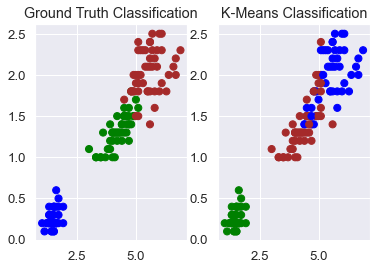

In [66]:
color_theme = np.array(['blue','green','brown'])

#for visualization let's create a subplot that has one row and two column
plt.subplot(1,2,1)

# we will plot petal length along the x-axis and the petal width along the y-axis
plt.scatter(x=iris_df.Petal_Length, y=iris_df.Petal_Width, c= color_theme[iris.target], s=50)

plt.title('Ground Truth Classification')
plt.subplot(1,2,2)

plt.scatter(x=iris_df.Petal_Length, y=iris_df.Petal_Width, c=color_theme[clustering.labels_],s=50)

plt.title('K-Means Classification')

In [ ]:
#The model appears to have predicted clusters pretty accurately except for the fact that the clusters themselves are mislabeled
# and that is easy to fix using number choose function

In [ ]:
#Using this function we can easily reassign label names to predicted labels
# We will say that a label 0 should be changed 1 and label 2 should be changed to 1
#So we will call this real label and we will call the truth function and p not choose

Text(0.5, 1.0, 'K-Means Classification')

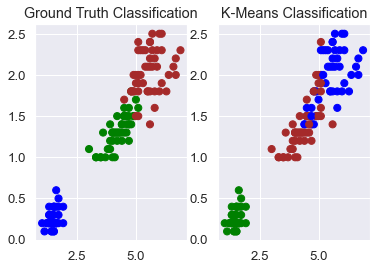

In [67]:
relabel=np.choose(clustering.labels_,[2,0,1]).astype(np.int64)

#for visualization let's create a subplot that has one row and two column
plt.subplot(1,2,1)

# we will plot petal length along the x-axis and the petal width along the y-axis
plt.scatter(x=iris_df.Petal_Length, y=iris_df.Petal_Width, c= color_theme[iris.target], s=50)

plt.title('Ground Truth Classification')
plt.subplot(1,2,2)

plt.scatter(x=iris_df.Petal_Length, y=iris_df.Petal_Width, c=color_theme[clustering.labels_],s=50)

plt.title('K-Means Classification')

In [68]:
#It looks like the K-Means model did a pretty good job of predicting the clusters
# In order to verify this quantitavely, we will use sidekick learners classification report to score the model
print(classification_report(y,relabel))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.74      0.78      0.76        50
           2       0.77      0.72      0.74        50

    accuracy                           0.83       150
   macro avg       0.83      0.83      0.83       150
weighted avg       0.83      0.83      0.83       150



In [ ]:
#Precision is a minor of a model relevancy
#is a my ear in the model completeness
#What we are going for in machine learning is high precision and high recall that indicates that you have highly accurate model results